# Data Extraction
For each of the articles, given in the input.xlsx file, extract the article text and save the extracted article in a text file with URL_ID as its file name.

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from itertools import chain
import os

In [2]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('cmudict')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kesha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\kesha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\kesha\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


True

In [3]:
df = pd.read_excel("../content/Input.xlsx")
df.head()

,URL_ID,URL
0,Netclan20241017,https://insights.blackcoffer.com/ai-and-ml-bas...
1,Netclan20241018,https://insights.blackcoffer.com/enhancing-fro...
2,Netclan20241019,https://insights.blackcoffer.com/roas-dashboar...
3,Netclan20241020,https://insights.blackcoffer.com/efficient-pro...
4,Netclan20241021,https://insights.blackcoffer.com/development-o...


## Exploring the data

In [4]:
len(df)

147

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URL_ID  147 non-null    object
 1   URL     147 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [6]:
print(f"{df['URL'][0]}")

https://insights.blackcoffer.com/ai-and-ml-based-youtube-analytics-and-content-creation-tool-for-optimizing-subscriber-engagement-and-content-strategy/


In [7]:
df['URL']

0      https://insights.blackcoffer.com/ai-and-ml-bas...
1      https://insights.blackcoffer.com/enhancing-fro...
2      https://insights.blackcoffer.com/roas-dashboar...
3      https://insights.blackcoffer.com/efficient-pro...
4      https://insights.blackcoffer.com/development-o...
                             ...                        
142    https://insights.blackcoffer.com/population-an...
143    https://insights.blackcoffer.com/google-lsa-ap...
144    https://insights.blackcoffer.com/healthcare-da...
145    https://insights.blackcoffer.com/budget-sales-...
146    https://insights.blackcoffer.com/amazon-buy-bo...
Name: URL, Length: 147, dtype: object

## Getting the data from the URL

b'<!doctype html >\r\n<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->\r\n<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html lang="en-US"> <!--<![endif]-->\r\n<head>\r\n    <title>AI and ML-Based YouTube Analytics and Content Creation Tool for Optimizing Subscriber Engagement and Content Strategy - Blackcoffer Insights</title>\r\n    <meta charset="UTF-8" />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n    <link rel="pingback" href="https://insights.blackcoffer.com/xmlrpc.php" />\r\n    <meta name=\'robots\' content=\'index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1\' />\n\t<style>img:is([sizes="auto" i], [sizes^="auto," i]) { contain-intrinsic-size: 3000px 1500px }</style>\n\t\n\t<!-- This site is optimized with the Yoast SEO plugin v24.7 - https://yoast.com/wordpress/plugins/seo/ -->\n\t<link rel="canonical" href="https://insights.blackcoffer.com/ai-and-ml-based-youtube
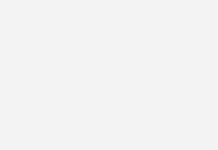
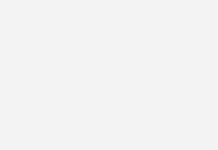
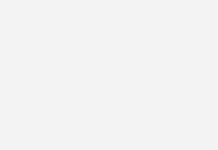
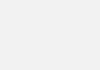
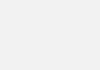
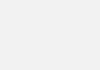
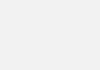
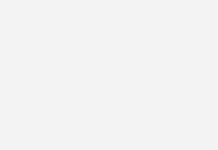
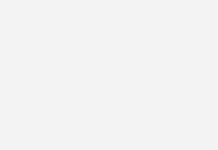
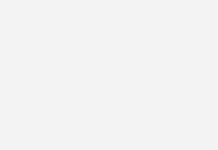
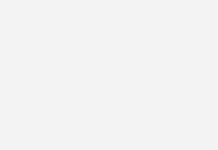

In [8]:
page = requests.get(df['URL'][0])
page.content

In [9]:
soup = BeautifulSoup(page.content, 'html.parser')
soup

<!DOCTYPE html >

<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->
<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en-US"> <!--<![endif]-->
<head>
<title>AI and ML-Based YouTube Analytics and Content Creation Tool for Optimizing Subscriber Engagement and Content Strategy - Blackcoffer Insights</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://insights.blackcoffer.com/xmlrpc.php" rel="pingback"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
<style>img:is([sizes="auto" i], [sizes^="auto," i]) { contain-intrinsic-size: 3000px 1500px }</style>
<!-- This site is optimized with the Yoast SEO plugin v24.7 - https://yoast.com/wordpress/plugins/seo/ -->
<link href="https://insights.blackcoffer.com/ai-and-ml-based-youtube-analytics-and-content-creation-tool-for-optimizing-subscriber-engagement-and-conten

In [10]:
# Extracting the Article of 1st URL
element_class = soup.find_all(attrs = {'class' : 'td-post-content tagdiv-type'})

for element in element_class:
    paragraphs = element.find_all('p')

    for paragraph in paragraphs:
        text = paragraph.get_text()
        print(text)

Client: A leading IT & tech firm in the USA
Industry Type: IT
Products & Services: IT Consulting, IT Support, SaaS, Marketing Strategy
Organization Size: 10+
Building AI and ML based YouTube analytics and content creation tool that will help youtuber to understand their subscriber’s watching behaviour, help them in content research, creation and publication. 
Created a MERN stack web application and integrated AI models to helps youtuber to generated titles, descriptions, tags, hashtags, captions etc. Help them to check thumbnail quality, analysis on the videos using video auditor tool, analysis on comments using sentiments analysis, help to under their subscribers using churn predication AI model. 
Web Applications
Supports
Maintenance 
Feature Enhancement
https://tubetool.ai
Summarized: https://blackcoffer.com/
This project was done by the Blackcoffer Team, a Global IT Consulting firm.
This solution was designed and developed by Blackcoffer TeamHere are my contact details:Firm Name: 

### Creating a function to get all articles

In [11]:
# Putting all things together and iterating to get all URL's articles.
def get_articles(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')

    element_classes = ['td-post-content tagdiv-type', 'tdb-block-inner td-fix-index']

    articles = []

    for class_name in element_classes:
        element_class = soup.find_all(attrs={'class': class_name})

        for element in element_class:
            paragraphs = element.find_all('p')

            for paragraph in paragraphs:
                para = paragraph.get_text()
                articles.append(para)

    return articles

In [12]:
urls = df['URL']
urls.head()

0    https://insights.blackcoffer.com/ai-and-ml-bas...
1    https://insights.blackcoffer.com/enhancing-fro...
2    https://insights.blackcoffer.com/roas-dashboar...
3    https://insights.blackcoffer.com/efficient-pro...
4    https://insights.blackcoffer.com/development-o...
Name: URL, dtype: object

In [ ]:
df['Articles'] = df['URL'].apply(get_articles)

In [ ]:
df

In [ ]:
# Checking for empty articles.
empty = df['Articles'].apply(lambda x: len(x) == 0)
print(empty)

In [ ]:
arts = df['Articles']
arts

In [ ]:
## Cleaning the Articles (removing -> [] & '') from starting and end

In [ ]:
def format_paragraphs(paragraphs):
    formatted_text = '\n'.join(paragraphs)
    return formatted_text

In [ ]:
df['Articles'] = df['Articles'].apply(format_paragraphs)
df.head()

In [ ]:
df['Articles'][5]

In [ ]:
# Saving the articles in text file with URL_ID as name.
folder_name = 'articles_folder'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

def save_articles_to_files(row):
    filename = os.path.join(folder_name, f"{row['URL_ID']}.txt")
    with open(filename, 'w', encoding='utf-8') as file:
        article_text = row['Articles']
        file.write(article_text)


df.apply(save_articles_to_files, axis=1)

In [ ]:
df.head()

## Analyzing the Extracted Text

In [ ]:
import nltk

nltk.download('vader_lexicon')

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
text = df['Articles'][0]
text

## Finding the Polarity Score and getting Positive, Negative and Compound Score

In [ ]:
pol = sia.polarity_scores(text)
pol

In [ ]:
# Getting the Polarity Scores
pol_scores = []

for article in df['Articles']:
    pol = sia.polarity_scores(article)
    pol_scores.append(pol)

pol_scores

In [ ]:
df['polarity_score'] = pol_scores
df.head()

In [ ]:
df['positive_score'] = [score['pos'] for score in pol_scores]
df['negative_score'] = [score['neg'] for score in pol_scores]

df.head()

In [ ]:
df.to_csv('sentiment.csv', index=False)

In [ ]:
df['polarity_score'][0]

In [ ]:
df['subjective_score'] = [score['compound'] for score in pol_scores]
df.info()

In [ ]:
df['subjective_score'].unique

In [ ]:
# Finding and removing the empty articles
def has_zero_sentences(text):
    sentences = nltk.sent_tokenize(text)
    return len(sentences) == 0

df['has_zero_sentences'] = df['Articles'].apply(has_zero_sentences)

In [ ]:
df[df['has_zero_sentences'] == True]

## Getting all the remaining Variables

In [ ]:
## This will solve the problem of KeyError caused by words containing special characters like commas.
import re

def count_syllables(word):
    word = re.sub(r'[^\w\s]', '', word)
    return max(1, len(nltk.corpus.cmudict.dict().get(word.lower(), [])))

In [ ]:
for index, row in df.iterrows():
    article = row['Articles']

    sentences = nltk.sent_tokenize(article)
    average_sentence_length = sum(len(nltk.word_tokenize(sentence)) for sentence in sentences) / len(sentences)

    words = nltk.word_tokenize(article)
    tagged = nltk.pos_tag(words)
    complex_words = [word for word in words if len(word) > 2]

    percentage_complex_words = (len(complex_words) / len(words)) * 100
    complex_word_count = len(complex_words)

    fog_index = 0.4 * (average_sentence_length + percentage_complex_words)

    total_word_count = len(words)
    average_words_per_sentence = total_word_count / len(sentences)
    average_word_length = sum(len(word) for word in words) / len(words)

    # total_syllables = sum(count_syllables(word) for word in words)
    # avg_syllables_per_word = total_syllables / total_word_count

    personal_pronouns = [word for word, pos in tagged if pos in ['PRP', 'PRP$', 'WP', 'WP$']]
    personal_pronoun_count = len(personal_pronouns)

    df.at[index, 'avg_sentence_length'] = average_sentence_length
    df.at[index, 'percentage_of_complex_words'] = percentage_complex_words
    df.at[index, 'fog_index'] = fog_index
    df.at[index, 'avg_number_of_words_per_sentence'] = average_words_per_sentence
    df.at[index, 'complex_word_count'] = complex_word_count
    df.at[index, 'word_count'] = total_word_count
    # df.at[index, 'syllable_per_word'] = avg_syllables_per_word
    df.at[index, 'Personal_Pronouns'] = personal_pronoun_count
    df.at[index, 'avg_word_length'] = average_word_length

df.head(2)

In [ ]:
df['Articles'][5]

In [ ]:
df['Articles'][2]

In [ ]:
df.to_csv('Sentiments.csv', index=False)